In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import math

In [28]:
def read_PD_result(rawfile):
    # output: dict {protein: protein_result, peptide: peptide_result, PSM: PSM_result}
    suffix = {'PSM': rawfile + '_PSMs.txt',
              'peptide': rawfile + '_PeptideGroups.txt',
              'protein': rawfile + '_Proteins.txt'}
    df_PD = {}
    for key in suffix:
        df_PD[key] = pd.read_csv(suffix[key], sep = '\t')
        df_PD[key]['File'] = rawfile.split(sep='/')[-1]
        
    return df_PD

In [32]:
# test of `read_PD_result`
df1 = read_PD_result('test/two_files-PD_output/19-149_HM0522_GM-1')
df2 = read_PD_result('test/two_files-PD_output/19-149_HM0522_GM-2')

In [18]:
def protein_result_to_db(protein_database, protein_result):
    """read protein result to database.
    input:
        - protein_database: pd.dataframe with normalized column name
        - protein_result: transformed raw result 
    output:
        - updated protein_database
    """
    # filter related columns
    result = protein_result[protein_database.columns]
    # append
    protein_database = protein_database.append(result)
    return protein_database



In [104]:
# test of `protein_result_to_db`
protein_db = pd.DataFrame(columns=["Accession", "Exp. q-value: Combined", "Coverage [%]", "File"])
# protein_db = read_protein(protein_db, df1['protein'])

protein_db = read_protein(protein_db, df1['protein'])
protein_db = read_protein(protein_db, df1['protein'])
print(protein_db.shape)
protein_db = read_protein(protein_db, df2['protein'])
print(protein_db.shape)
print(protein_db[:10])
print(protein_db[-10:])
# print(protein_db)

(13576, 4)
(20120, 4)
    Accession  Exp. q-value: Combined Coverage [%]                File
0      E9PQH6                     0.0           67  19-149_HM0522_GM-1
1      E5RIC7                     0.0            5  19-149_HM0522_GM-1
2      H7C2Y5                     0.0            7  19-149_HM0522_GM-1
3      O95881                     0.0            8  19-149_HM0522_GM-1
4      E9PD92                     0.0           20  19-149_HM0522_GM-1
5  A0A2R8Y706                     0.0            5  19-149_HM0522_GM-1
6      M0R1V7                     0.0           70  19-149_HM0522_GM-1
7      Q5TA01                     0.0            9  19-149_HM0522_GM-1
8      Q13423                     0.0            3  19-149_HM0522_GM-1
9      P06734                     0.0           21  19-149_HM0522_GM-1
       Accession  Exp. q-value: Combined Coverage [%]                File
6534      P30613                   0.000            3  19-149_HM0522_GM-2
6535  A0A087WY10                   0.000         

In [102]:
# init protein bar plot
# protein read from meta table
# a demo picture: filter by all and protein q.value < 0.01

rawfiles = ['test/two_files-PD_output/19-149_HM0522_GM-1',
            'test/two_files-PD_output/19-149_HM0522_GM-2']

meta_db = {'file': [file.split(sep='/')[-1] for file in rawfiles]}

def filter_protein_count(protein_db):
    # protein filter
    protein_fdr = protein_db[protein_db['Exp. q-value: Combined'] < 0.01]
    pivot = pd.pivot_table(protein_fdr, values='Accession',
                           index='File', aggfunc='count')
    # flatten pivot table to normal df
    flatten = pd.DataFrame(pivot.to_records())
    return flatten
    

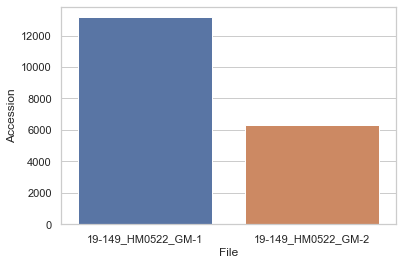

In [105]:
result = filter_protein_count(protein_db)
# print(type(result))
# print(result['Accession'])
# result['File']
# type(result)
sns.set(style="whitegrid")
sns.barplot(x='File', y='Accession', data=result)

In [6]:
# init db
"""
rawfiles = ['test/two_files-PD_output/19-149_HM0522_GM-1',
            'test/two_files-PD_output/19-149_HM0522_GM-2']

def read_PD_result(rawfile):
    suffix = {'PSM': rawfile + '_PSMs.txt',
              'peptide': rawfile + '_PeptideGroups.txt',
              'protein': rawfile + '_Proteins.txt'}
    df_PD = {}
    for key in suffix:
        df_PD[key] = pd.read_csv(suffix[key], sep = '\t')
        
    return df_PD['protein'], df_PD['peptide'], df_PD['PSM']

# could contencate together to a large table
protein_db = []
peptide_db = []
PSM_db = []

# a better name convention
for file in rawfiles:
    protein, peptide, PSM = read_PD_result(file)
    protein_db.append(protein)
    peptide_db.append(peptide)
    PSM_db.append(PSM)

# print(len(protein_db))
protein_db = pd.concat(protein_db, keys = rawfiles)
# print(protein_db.describe())
# print(protein_db[:5])
print(peptide.columns)

# 
import numpy as np
# PSM['Percolator PEP'].apply(lambda x: np.log10(x)).plot.hist()
# PSM0['Percolator PEP'].apply(lambda x: np.log10(x)).plot.hist()
"""

Index(['Checked', 'Confidence', 'PSM Ambiguity', 'Sequence',
       'Annotated Sequence', 'Modifications',
       'Modifications (all possible sites)', 'Qvality PEP', 'Qvality q-value',
       'SVM_Score', '# Protein Groups', '# Proteins', '# PSMs',
       'Master Protein Accessions', 'Positions in Master Proteins',
       'Modifications in Master Proteins (all Sites)',
       'Modifications in Master Proteins', 'Master Protein Descriptions',
       'Protein Accessions', '# Missed Cleavages', 'Theo. MH+ [Da]',
       'Sequence Length', '# Razor Quan Results',
       'Abundances (Scaled): F2: Sample',
       'Abundances (Normalized): F2: Sample', 'Abundance: F2: Sample',
       'Abundances Count: F2: Sample', 'Quan Info',
       'Found in Sample: [S2] F2: Sample',
       'Found in Sample Group: [S2] F2: Sample',
       'Confidence (by Search Engine): Sequest HT',
       'Charge (by Search Engine): Sequest HT',
       'DeltaScore (by Search Engine): Sequest HT',
       'DeltaCn (by Searc

/Users/mofrankhu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [38]:
# filter PD PSM q-Value and PEP
# unify in later version (import and transform before put into db and output)
print('len PSM {}'.format(len(PSM)))
print('len PEP < 0.01: {}'.format(
    len(PSM[PSM['Percolator q-Value'] < 0.01])))
print('len PEP < 0.01: {}'.format(
    len(PSM[PSM['Percolator PEP'] < 0.01])))

len PSM 14658
len PEP < 0.01: 14658
len PEP < 0.01: 12582


In [45]:
# filter PD PSM q-Value and PEP
# unify in later version 
# (import and transform before put into db and output)
print('len PSM {}'.format(len(PSM)))
print('len PEP < 0.01: {}'.format(
    len(PSM[PSM['Percolator q-Value'] < 0.01])))
print('len PEP < 0.01: {}'.format(
    len(PSM[PSM['Percolator PEP'] < 0.01])))
print('len PSM0 {}'.format(len(PSM0)))
print('PSM0 len PEP < 0.01: {}'.format(
    len(PSM0[PSM0['Percolator q-Value'] < 0.01])))
print('PSM0 len PEP < 0.01: {}'.format(
    len(PSM0[PSM0['Percolator PEP'] < 0.01])))


# draw QC barplot of PSM here



len PSM 14658
len PEP < 0.01: 14658
len PEP < 0.01: 12582
len PSM0 14759
PSM0 len PEP < 0.01: 14759
PSM0 len PEP < 0.01: 12676


In [25]:
PSM.columns

Index(['Checked', 'Confidence', 'Identifying Node Type', 'Identifying Node',
       'Search ID', 'Identifying Node No', 'PSM Ambiguity', 'Sequence',
       'Annotated Sequence', 'Modifications', '# Proteins',
       'Master Protein Accessions', 'Master Protein Descriptions',
       'Protein Accessions', 'Protein Descriptions', '# Missed Cleavages',
       'Charge', 'Original Precursor Charge', 'DeltaScore', 'DeltaCn', 'Rank',
       'Search Engine Rank', 'Concatenated Rank', 'm/z [Da]', 'MH+ [Da]',
       'Theo. MH+ [Da]', 'DeltaM [ppm]', 'Deltam/z [Da]', 'Ions Matched',
       'Matched Ions', 'Total Ions', 'Intensity', 'Activation Type',
       'MS Order', 'Isolation Interference [%]', 'Ion Inject Time [ms]',
       'RT [min]', 'First Scan', 'Last Scan', 'Master Scan(s)',
       'Spectrum File', 'File ID', 'Quan Info', 'Peptides Matched', 'XCorr',
       '# Protein Groups', 'Percolator q-Value', 'Percolator PEP',
       'Percolator SVMScore', 'Precursor Abundance', 'Apex RT [min]'],
 

In [36]:
# filter peptide group
# have to fillna before contencate.
# for precise peptide group venn
peptide['Modifications'] = peptide['Modifications'].fillna('')
peptide['mod_sequence'] = peptide['Sequence'] +'.'+ peptide['Modifications'] 

In [37]:
peptide['mod_sequence'][:20]

0                                        AAAAAAALQAK.
1                                     AAAEVNQDYGLDPK.
2                                          AAAFEQLQK.
3                                       AAALEAMKDYTK.
4                                    AAALEFLNRFEEAKR.
5                                         AAAMANNLQK.
6                                    AAAPDVAPAPGPAPR.
7                 AAAQCYIDLIIK.1xCarbamidomethyl [C5]
8                                      AAATPESQEPQAK.
9                   AACLPLPGYR.1xCarbamidomethyl [C3]
10      AADCEVEQWDSDEPIPAKELER.1xCarbamidomethyl [C4]
11                                       AADIDQEVKER.
12                      AAEAAAAPAESAAPAAGEEPSKEEGEPK.
13                AAECNIVVTQPR.1xCarbamidomethyl [C4]
14    AAEGGLSSPEFSELCIWLGSQIK.1xCarbamidomethyl [C15]
15                              AAELIANSLATAGDGLIELR.
16                               AAFDDAIAELDTLSEESYK.
17          AAFGLSEAGFNTACVTK.1xCarbamidomethyl [C14]
18               AAFNSGKVDIV

In [5]:
df = pd.read_csv('test/two_files-PD_output/'
                 '19-149_HM0522_GM-1_PeptideGroups.txt', sep='\t')

In [10]:
sum(df['# PSMs'])

14658

In [7]:
df.columns

Index(['Checked', 'Confidence', 'PSM Ambiguity', 'Sequence',
       'Annotated Sequence', 'Modifications',
       'Modifications (all possible sites)', 'Qvality PEP', 'Qvality q-value',
       'SVM_Score', '# Protein Groups', '# Proteins', '# PSMs',
       'Master Protein Accessions', 'Positions in Master Proteins',
       'Modifications in Master Proteins (all Sites)',
       'Modifications in Master Proteins', 'Master Protein Descriptions',
       'Protein Accessions', '# Missed Cleavages', 'Theo. MH+ [Da]',
       'Sequence Length', '# Razor Quan Results',
       'Abundances (Scaled): F1: Sample',
       'Abundances (Normalized): F1: Sample', 'Abundance: F1: Sample',
       'Abundances Count: F1: Sample', 'Quan Info',
       'Found in Sample: [S1] F1: Sample',
       'Found in Sample Group: [S1] F1: Sample',
       'Confidence (by Search Engine): Sequest HT',
       'Charge (by Search Engine): Sequest HT',
       'DeltaScore (by Search Engine): Sequest HT',
       'DeltaCn (by Searc

In [19]:
df = pd.read_csv('test/LFQ_Spectronaut_12.0.20491.19.18826/Report_Protein Quant (Normal).xls', sep='\t')
# Spectronaut: peptide quan and protein quan table is selected
# pending decision from BGS report, or peptide and protein quan
# a MVP decision would be peptide and protein quan, as code is much simpler.

In [20]:
df1 = df[:10][['R.FileName', 'PG.ProteinAccessions', 'PG.Quantity']]
df1.rename(index=str, columns={
    'R.FileName':'Samplename',
    'PG.ProteinAccessions':'ProteinAccession',
    'PG.Quantity':'ProteinQuan'})

,Samplename,ProteinAccession,ProteinQuan
0,TJ-1-DIA_1,A5A613,7.130495e+04
1,TJ-1-DIA_1,A5A614,4.016720e+04
2,TJ-1-DIA_1,O32583,5.106850e+03
3,TJ-1-DIA_1,P00350,4.918652e+06
4,TJ-1-DIA_1,P00363,3.755746e+04
5,TJ-1-DIA_1,P00370,7.790481e+05
6,TJ-1-DIA_1,P00393,1.904188e+05
7,TJ-1-DIA_1,P00448,9.280251e+05
8,TJ-1-DIA_1,P00452,2.926262e+05
9,TJ-1-DIA_1,P00490,1.366855e+05


In [21]:
# rename function for spectronaut input
df1 = df[['R.FileName', 'PG.ProteinAccessions', 'PG.Quantity']]
df1 = df1.rename(index=str, columns={
    'R.FileName':'Samplename',
    'PG.ProteinAccessions':'ProteinAccession',
    'PG.Quantity':'ProteinQuan'})
df_pivot = df1.pivot(index='ProteinAccession',columns='Samplename', values='ProteinQuan')


# df_pivot.describe()
# df_pivot.index

In [31]:
# use applymap instead of apply for element-wise function
df_log = df_pivot.dropna(how='any').applymap(lambda x: math.log(x,10))



df_log.iloc[:10,:]

Samplename,TJ-1-DIA_1,TJ-1-DIA_2,TJ-1-DIA_3,TJ-2-DIA_1,TJ-2-DIA_2,TJ-2-DIA_3
ProteinAccession,,,,,,
A5A613,4.853120,4.865022,4.841989,4.833110,4.825059,4.825077
A5A614,4.603872,4.804208,4.595834,4.592614,4.584191,4.553938
P00350,6.691846,6.690687,6.691578,6.648896,6.672619,6.665172
P00363,4.574696,4.555029,4.569228,4.567630,4.491281,4.538206
P00370,5.891564,5.867127,5.891883,6.056016,6.055144,6.048590
P00393,5.279710,5.262819,5.274922,5.361854,5.373349,5.387637
P00448,5.967560,5.982492,5.954370,6.021247,6.037274,6.069453
P00452,5.466313,5.484284,5.448338,5.412070,5.425361,5.430646
P00490,5.135722,5.123495,5.112375,5.034995,5.055581,5.052507


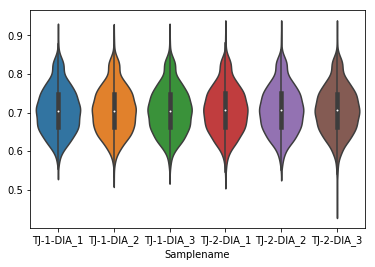

In [30]:
df_log = df_log.fillna(1).applymap(lambda x: math.log(x,10))
sns.violinplot(data=df_log)

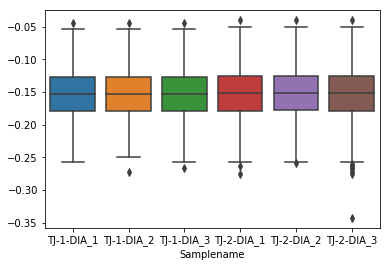

In [27]:
sns.boxplot(data=df_log)

TJ-1-DIA_1: 1910
TJ-1-DIA_2: 1906
TJ-1-DIA_3: 1916
TJ-2-DIA_1: 1892
TJ-2-DIA_2: 1893
TJ-2-DIA_3: 1895


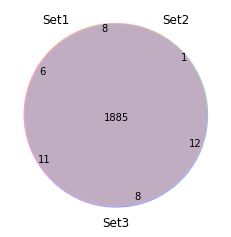

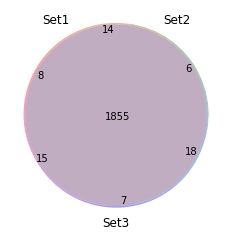

In [25]:
# venn plot using matplotlib

df_venn = df_pivot.fillna(0)

set_columns = {} 

for col in df_venn:
    # print(col)
    set_columns[col] = set()
    # print(df_venn[col])
    for i in range(len(df_venn[col])):
        if df_venn[col][i] != 0:  # regard 0 as missing value, do not add them
            # print(df_venn[col])
            # print(type(df_venn[col]))
            # print(df_venn.index[i])
            # break
            set_columns[col].add(df_venn.index[i])
            
for key in set_columns:
    print("{}: {}".format(key, len(set_columns[key])))
# print(set_columns)

set1 = set_columns['TJ-1-DIA_1']
set2 = set_columns['TJ-1-DIA_2']
set3 = set_columns['TJ-1-DIA_3']

from matplotlib_venn import venn3
 
venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

set1 = set_columns['TJ-2-DIA_1']
set2 = set_columns['TJ-2-DIA_2']
set3 = set_columns['TJ-2-DIA_3']

 
venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()